In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# DLS

In [2]:
Boro125 = pd.read_csv("DLS/Boro_125_2.csv").rename(columns = {"Boro .125 2" : "Boro125"}).astype({"Boro125": float})
Boro125_2 =pd.read_csv("DLS/Boro 0.125.csv").rename(columns = {"Boro .125":"Boro125"})
Boro25 = pd.read_csv("DLS/Boro 0.25.csv").rename(columns = {"NaBH4 0.25":"Boro25"})
Boro5 = pd.read_csv("DLS/Boro 0.5 2.csv").rename(columns = {"Meas 1":"Boro5"})
Malico125 = pd.read_csv("DLS/Málico .125 buena.csv").rename(columns = {"Malico .125 Buena":"Malico125"})
Malico25 = pd.read_csv("DLS/Málico 0.25 repetición.csv").rename(columns = {"Malico .25 Repeticion":"Malico25"})
Malico5 = pd.read_csv("DLS/Málico 0.5.csv").rename(columns={"Malico 0.5":"Malico5"})
Tarta125 = pd.read_csv("DLS/Tarta .125.csv").rename(columns={"Tarta .125":"Tarta125"})
Tarta25 = pd.read_csv("DLS/Tartárico 0.25.csv").rename(columns={"Tartarico .25":"Tarta25"})
Tarta5 = pd.read_csv("DLS/Tartárico 0.5.csv").rename(columns={"Tartarico 0.5":"Tarta5"})

**Get rid of the zeros**

In [3]:
Boro1 = Boro125[Boro125['Boro125'] > 0]
Boro2 = Boro125_2[Boro125_2['Boro125']>0]
Boro125 = Boro1.merge(Boro2,how = 'outer')
Boro25 = Boro25[Boro25['Boro25']>0]
Boro5 = Boro5[Boro5['Boro5']>0]
Malico125 = Malico125[Malico125['Malico125']>0]
Malico25 = Malico25[Malico25['Malico25']>0]
Malico5 = Malico5[Malico5['Malico5']>0]
Tarta125 = Tarta125[Tarta125['Tarta125']>0]
Tarta25 = Tarta25[Tarta25['Tarta25']>0]
Tarta5 = Tarta5[Tarta5['Tarta5']>0]

In [4]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "axes",
    labelweight="normal",
    labelsize="large",
    titleweight="normal",
    titlesize=16,
    titlepad=10,
)

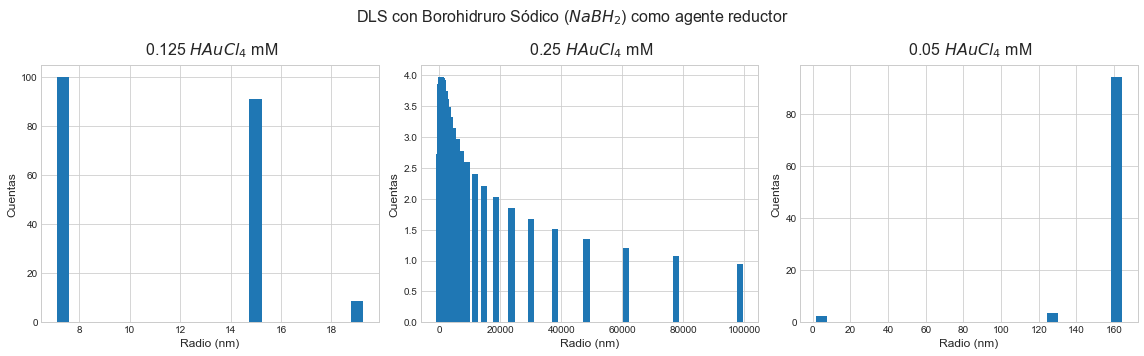

In [9]:
plt.rc("figure", autolayout=True, figsize=(16, 5)) 



plt.subplot(1 ,3 ,1)
plt.bar(Boro125['Radius (nm)'],Boro125['Boro125'],width=0.5)
plt.title(' 0.125 $HAuCl_4$ mM ');
plt.ylabel('Cuentas')
plt.xlabel('Radio (nm)')

plt.subplot(1, 3, 2)
plt.bar(Boro25['Radius (nm)'],Boro25['Boro25'],width=2000)
plt.title(' 0.25 $HAuCl_4$ mM ');
plt.ylabel('Cuentas')
plt.xlabel('Radio (nm)')

plt.subplot(1, 3, 3)
plt.bar(Boro5['Radius (nm)'],Boro5['Boro5'],width=6)
plt.title(' 0.05 $HAuCl_4$ mM ');
plt.suptitle('DLS con Borohidruro Sódico ($NaBH_2$) como agente reductor', size = 16);
plt.ylabel('Cuentas')
plt.xlabel('Radio (nm)')

plt.savefig('DLS_Boro.png', bbox_inches='tight')

# Rayos X

In [27]:
df = pd.read_csv("DRX/Au NPs Equipo 1 Borohidruro 125.asc", skiprows=78)



,1,2,3,4
0,270,236.0,245.0,258.0
1,292,271.0,265.0,244.0
2,276,249.0,278.0,268.0
3,260,263.0,262.0,247.0
4,239,247.0,262.0,257.0
...,...,...,...,...
248,126,108.0,94.0,101.0
249,128,116.0,107.0,130.0
250,115,NaN,NaN,NaN
251,*END,NaN,NaN,NaN


In [66]:

def DF_of_asc(dire,skip):
    df = pd.read_csv(dire, skiprows=78)
    list_of_csv = [list(row) for row in df.values]
    item_list = [item for sublist in list_of_csv for item in sublist]
    return pd.DataFrame(item_list,columns = ['Readings']).dropna()


In [72]:
df2  = DF_of_asc("DRX/Au NPs Equipo 1 Borohidruro 125.asc",78)

df2[:1001]

,Readings
0,270
1,236.0
2,245.0
3,258.0
4,292
...,...
996,128
997,116.0
998,107.0
999,130.0


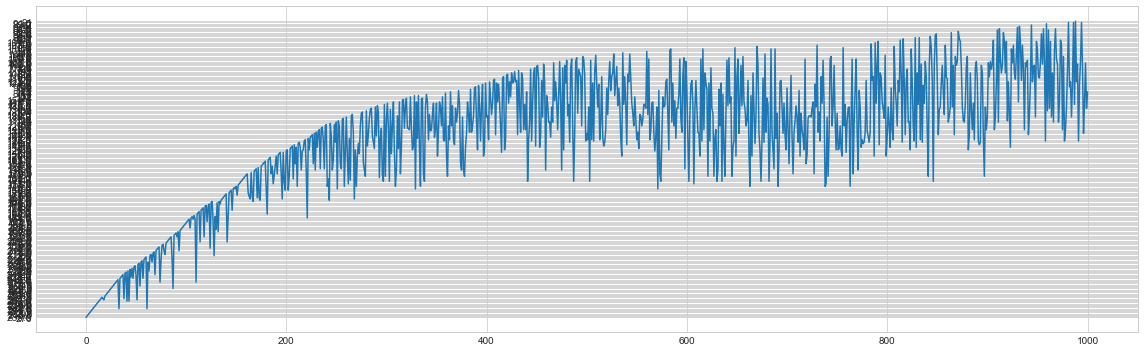

In [103]:

y = df2[:1001]
y = y.Readings.tolist()
x = list(range(0,len(y)))
plt.plot(x,y)


# UV -Vis

In [18]:
UV = pd.read_csv("UV-Vis/Au NPs Equipo 1 repetición.csv")
UV.head()

,Wavelength(nm),Baseline,Boro125,Boro25,Boro5,Malico125,Malico25,Malico5,Tarta125,Tarta25,Tarta5
0,200.0,0.138634,1.452201,1.699642,0.702597,2.740576,4.0,1.765840,4.0,4.000000,4.0
1,200.5,0.135864,1.433861,1.670819,0.691192,2.592995,4.0,1.742478,4.0,4.000000,4.0
2,201.0,0.135067,1.409971,1.644137,0.680529,2.469644,4.0,1.727595,4.0,4.000000,4.0
3,201.5,0.134567,1.390325,1.622504,0.670934,2.386075,4.0,1.718741,4.0,3.612595,4.0
4,202.0,0.133764,1.374353,1.604730,0.662648,2.327992,4.0,1.711036,4.0,3.020551,4.0
